**In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time - April 2018**

In [42]:
#Import panda and numpy libs

import pandas as pd
import numpy as np

In [43]:
#Import csv file as a dataframe and dispalay 10 first rows
#Colnames=['Address','Cars','Bluecar counter','Utilib counter','Utilib 1.4 counter','Charge Slots','Charging Status','City','Displayed comment','ID','Kind','Geo point','Postal code',         
# 'Public name','Rental status','Scheduled at','Slots','Station type','Status','Subscription status','year','month','day','hour' ]                
 
url="/content/Autolib_dataset (2).csv"
 
Autolib=pd.read_csv(url )
 
Autolib.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
Autolib['ID']

In [ ]:
#Df general information
Autolib.info()

In [ ]:
#Shape
Autolib.shape

In [ ]:
#Data types in dataset
Autolib.dtypes

In [ ]:
#Data Validity 
#Remove any unneeded data from the dataset 
#Check syntax errors
#Remove any spaces 

New_Autolib_dataset=Autolib.drop(columns=['Charge Slots', 'Charging Status','ID', 'Geo point','year', 'Subscription status'])
New_Autolib_dataset.head(1)

In [ ]:
New_Autolib_dataset.info()

In [ ]:
#Accuracy 
#Data accuracy - Check if the values in the data make sense and have accurate computations by comparing values given  


In [ ]:
#Completeness
#We check for null values 
#Count and replace 


# Checking if there is any missing value in dataframe as a whole
 
New_Autolib_dataset.isnull()

In [ ]:
# Checking if there is any missing value across each column
New_Autolib_dataset.isnull().any()

In [ ]:
# Checking how many missing values there are across each column

New_Autolib_dataset.isnull().sum()

In [ ]:
#  we can do a quick check to see if we have any missing values at all
New_Autolib_dataset.isnull().values.any()

In [ ]:
#Drop all rows with all missing values
all_rows_all_na = New_Autolib_dataset.dropna(how="all")
print(all_rows_all_na)

In [ ]:
#Remove columns with very high numbers of missing values and they may not be relevant 

New_Autolib_dataset=New_Autolib_dataset.drop(columns=[ 'Displayed comment', 'Scheduled at','Rental status'])
New_Autolib_dataset.head(1)

In [ ]:
# Checking if there is any missing value in new dataframe as a whole
 
New_Autolib_dataset.isnull().sum()

In [ ]:
New_Autolib_dataset.shape

(5000, 16)

In [ ]:
#CONSISTENCY 
#Check for duplicates in rows

duplicate = New_Autolib_dataset[New_Autolib_dataset.duplicated()] 
duplicate

In [ ]:
#Check for duplicates in columns 
#Get a list of duplicate columns.
#The cars colums has the same number as the Blue cars from data description


In [ ]:
#Drop duplicate column to the blue car counter (Number of cars
# available at the station - redundant with Bluecar counter, always the same value)
New_Autolib_dataset=New_Autolib_dataset.drop(columns=['Cars'])
New_Autolib_dataset


**Questions to answer**

In [53]:
#Load the new cleaned dataset
# Importing the pandas library
 
import pandas as pd

# Importing the numpy library
#
import numpy as np
New_Autolib_dataset=New_Autolib_dataset.to_csv('New_Autolib_dataset.csv')



In [ ]:
New_Autolib_dataset=pd.read_csv('/content/New_Autolib_dataset.csv')

New_Autolib_dataset.head(5)

In [57]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
#in the city of Paris over the month of April 2018.
PopHr=New_Autolib_dataset.loc[(New_Autolib_dataset['City'] == 'Paris') &
                               (New_Autolib_dataset['Bluecar counter']!=0) ,['hour']]
PopHr.value_counts().nlargest(1)

hour
21      95
dtype: int64

In [58]:
#What postal code is the most popular for picking up Blue cars At the most popular picking hour?
W=New_Autolib_dataset.loc[(New_Autolib_dataset['hour'] == 21) &
                               (New_Autolib_dataset['Bluecar counter']!=0) ,['Postal code']]
W.value_counts().nlargest(1)

Postal code
75014          12
dtype: int64

In [59]:
#What is the most popular hour for returning cars?
New_Autolib_dataset['hour'].value_counts().nlargest(1)

21    237
Name: hour, dtype: int64

In [ ]:
#Most popular postal code
New_Autolib_dataset['Postal code'].value_counts().nlargest(1)

In [ ]:
#Most popular city
New_Autolib_dataset['City'].value_counts()

In [ ]:
#What station is the most popular?
#Overall?
New_Autolib_dataset['Public name'].value_counts().nlargest(1)

Paris/Porte de Montrouge/8    13
Name: Public name, dtype: int64

In [ ]:
#What station is the most popular?At the most popular picking hour?
popular_station=New_Autolib_dataset.loc[(New_Autolib_dataset['hour'] == 21) ,['Public name']]
popular_station.value_counts().nlargest(1)

Public name      
Paris/Tronchet/19    4
dtype: int64

In [ ]:
#What postal code is the most popular for picking up Blue cars? 

popular_postal=New_Autolib_dataset.loc[(New_Autolib_dataset['Bluecar counter'] != 0) ,['Postal code']]
popular_postal.value_counts().nlargest(1)


Postal code
75015          195
dtype: int64

In [ ]:
#What postal code is the most popular for picking up Utilib 1.4 counter cars? 
 
popular_postal=New_Autolib_dataset.loc[(New_Autolib_dataset['Utilib 1.4 counter'] != 0) ,['Postal code']]
popular_postal.value_counts().nlargest(1)

Postal code
75017          36
dtype: int64

In [ ]:
#What postal code is the most popular for picking up Utilib counter? 

popular_postal=New_Autolib_dataset.loc[(New_Autolib_dataset['Utilib counter'] != 0) ,['Postal code']]
popular_postal.value_counts().nlargest(1)

Postal code
75016          20
dtype: int64

In [ ]:
#Does the most popular station belong to that  most popular postal code?(Most popular postal code being 75015-274)


x=New_Autolib_dataset.loc[(New_Autolib_dataset['Public name'] == 'Paris/Porte de Montrouge/8') ,['Postal code']]
x.mode().value_counts()

Postal code
75014          1
dtype: int64

In [ ]:
##Does the most popular station belong to that  most popular postal code(75015-274) At the most popular picking hour(21)
PopStat=New_Autolib_dataset.loc[(New_Autolib_dataset['Public name'] == 'Paris/Porte de Montrouge/8') &
                               (New_Autolib_dataset['hour']==21) ,['Postal code']]

PopStat.value_counts()

Postal code
75014          1
dtype: int64

In [ ]:
#Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 
#The most popular hour in paris in April 
PopHr_Utilib=New_Autolib_dataset.loc[(New_Autolib_dataset['City'] == 'Paris') &
                               (New_Autolib_dataset['Utilib 1.4 counter']!=0) & (New_Autolib_dataset['month']==4),['hour']]
PopHr_Utilib.value_counts().nlargest(1)

hour
21      18
dtype: int64

In [ ]:
#What postal code is the most popular for picking up Utilib 1.4 counter? 

popular_postal=New_Autolib_dataset.loc[(New_Autolib_dataset['Utilib 1.4 counter'] != 0) ,['Postal code']]
popular_postal.value_counts().nlargest(1)

Postal code
75017          36
dtype: int64

In [ ]:
#What postal code is the most popular for picking up Utilib  

popular_postal=New_Autolib_dataset.loc[(New_Autolib_dataset['Utilib counter'] != 0) ,['Postal code']]
popular_postal.value_counts().nlargest(1)

Postal code
75016          20
dtype: int64

In [ ]:
PopHr_Utilib=New_Autolib_dataset.loc[(New_Autolib_dataset['City'] == 'Paris') &
                               (New_Autolib_dataset['Utilib counter']!=0) ,['hour']]
PopHr_Utilib.value_counts().nlargest(1)

hour
6       12
dtype: int64

In [62]:
#At the most popular picking hour Utilib counter

PopStat=New_Autolib_dataset.loc[(New_Autolib_dataset['Public name'] == 'Paris/Porte de Montrouge/8') &
                               (New_Autolib_dataset['hour']==21) ,['Postal code']]
PopStat

,Postal code
3392,75014


In [ ]:
#Most used car by values 
New_Autolib_dataset['Utilib counter'].sum()



In [ ]:
New_Autolib_dataset['Utilib 1.4 counter'].sum()


In [ ]:
New_Autolib_dataset['Bluecar counter'].sum()

In [ ]:
#Most popular kind of car
New_Autolib_dataset['Kind'].value_counts()
#Station with all utilities

In [ ]:
#Busiest month with renting cars 
New_Autolib_dataset['month'].value_counts()
#Station with all utilities

In [ ]:
#The highest number of parking slots in the station 
New_Autolib_dataset['Slots'].value_counts()

In [ ]:
#Number of parking slots in each station 

slots=New_Autolib_dataset.loc[(New_Autolib_dataset['Slots'] != 0) ,['Public name']]

slots.value_counts()

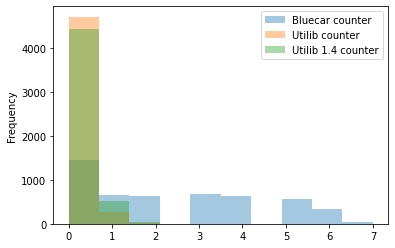

In [64]:
#A histogram to show distribution of car usage
New_Autolib_dataset[['Bluecar counter','Utilib counter','Utilib 1.4 counter']].plot.hist(alpha=0.4)